In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
ds = pd.read_csv('pima-indians-diabetes.csv')
ds.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [16]:
X = ds.iloc[:,0:7].values 
y = ds.iloc[:,-1].values 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [28]:
from sklearn.svm import SVC
classifier = SVC(gamma='auto',random_state=0,)
classifier.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

#  if you call this with random_state=0 (or any other value), then each and every time, you'll get the same result.
# a deprecated version of ‘auto’ is used as a default indicating that no explicit value of gamma was passed.


In [29]:
y_pred = classifier.predict(X_test)

In [30]:
# Import the library
import sklearn.metrics
# Make the Confusion Matrix
cm = sklearn.metrics.confusion_matrix(y_test,y_pred)
cm

array([[71,  7],
       [18, 20]], dtype=int64)

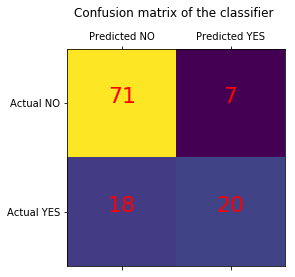

In [31]:
import itertools

labels = ['Predicted NO', 'Predicted YES','Actual NO','Actual YES']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')

ax.set_xticklabels([''] + labels[0:2])
ax.set_yticklabels([''] + labels[2:4])

fmt = '.0f'

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="red", fontsize = 22)

plt.show()